<a href="https://colab.research.google.com/github/pgdinamica/ftd2024/blob/main/Bandeira_do_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FTD - Articulação Matemática - Outubro | 2024

## A matemática das imagens digitais

### Prof: Hallison Paz

### Experimento com a bandeira do Brasil

In [ ]:
from PIL import Image
from math import isclose

In [ ]:
def eq_reta(p1, p2):
    if isclose(p2[0] - p1[0], 0):
        print("aqui")
        return lambda x, y: x
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    return lambda x, y: y - p1[1] - m*(x - p1[0])

def desenhar_quadrilatero(img, cor, pontos):
    ladoA = eq_reta(pontos[0], pontos[1])
    ladoB = eq_reta(pontos[1], pontos[2])
    ladoC = eq_reta(pontos[2], pontos[3])
    ladoD = eq_reta(pontos[3], pontos[0])
    altura = img.height
    comprimento = img.width
    for i in range(altura):
        for j in range(comprimento):
            if (ladoA(j, i) >= 0 and
                ladoB(j, i) >= 0 and
                ladoC(j, i) <= 0 and
                ladoD(j, i) <= 0):
                img.putpixel((j, i), cor)

    return img

def desenhar_circulo(img, cor, centro, raio):
    comprimento = img.width
    altura = img.height
    for i in range(altura):
        for j in range(comprimento):
            if (j - centro[0])**2 + (i - centro[1])**2 <= raio**2:
                img.putpixel((j, i), cor)
    return img


In [ ]:
# cores oficiais da bandeira
AZUL = (0, 39, 118)
AMARELO = (255, 223, 0)
VERDE = (0, 156, 59)
# cria imagem com a proporção oficial da bandeira
altura = 700
comprimento = int(altura / 14 * 20)
dimensoes = (comprimento, altura)
# cria bandeira com fundo verde
bandeira = Image.new("RGB", dimensoes, VERDE)
# distância do losango às bordas
dist_losango = int(altura / 14 * 1.7)
# vértices do losando
vertices = [
    (dist_losango, altura//2),
    (comprimento//2, dist_losango),
    (comprimento - dist_losango, altura//2),
    (comprimento//2, altura - dist_losango)
]
# adiciona losango amarelo
bandeira = desenhar_quadrilatero(bandeira, AMARELO, vertices)

centro = (comprimento//2, altura//2)
raio = int(3.5 * altura / 14)
# adiciona círculo azul
bandeira = desenhar_circulo(bandeira, AZUL, centro, raio)
bandeira.save("brasil-final.png")

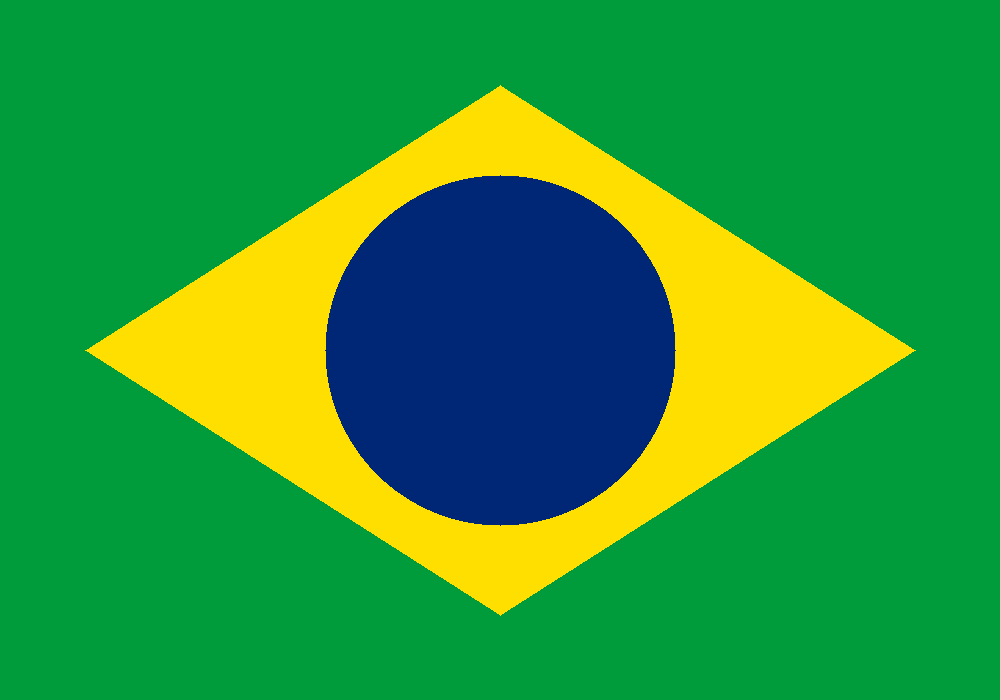

In [ ]:
bandeira